### HCP Data - Unprocessed, 3T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch
from radio.data.datavisualization import plot_batch

#### Setup Data

In [6]:
# Load pre-stored data from train/test/val folders 
data = rio.data.HCPDataModule(
    root="/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies",
    study="HCP_test",
    subj_dir="radio_3T_MPR/unprocessed",
    data_dir="",
    use_augmentation=False,
    use_preprocessing=False,
    resample=False,
    batch_size=4,
    modalities=["3T_MPR", "3T_SPC"],
    labels=[],
    dims=(256, 320, 320),
)
data.prepare_data()
data.setup()

/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:126: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


In [19]:
# Takes a while because it scans CEREBRO Study directory for the data.
# Pre-storing the data into train and test folders will speed up the process.
data = rio.data.HCPDataModule(
    root="/data",
    study="HCP",
    subj_dir="",
    data_dir="unprocessed",
    use_augmentation=False,
    use_preprocessing=False,
    resample=False,
    batch_size=1,
    modalities=["3T_MPR"],
    labels=[],
    dims=None,
)
data.prepare_data()
data.setup()

In [7]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 7 subjects.
Validation: 1 subjects.
Test: 2 subjects.


#### Get a Train and a Test Batch

In [8]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [9]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [10]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Sample shape: {train_batch['3T_MPR']['data'].shape}")
print(f"Image keys: {train_batch['3T_MPR'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")

Batch keys: dict_keys(['subj_id', 'field', '3T_MPR'])
Sample shape: torch.Size([4, 1, 256, 320, 320])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['100610', '101107', '101006', '101915']


#### Plot Example Samples from Batches

Subject: 1


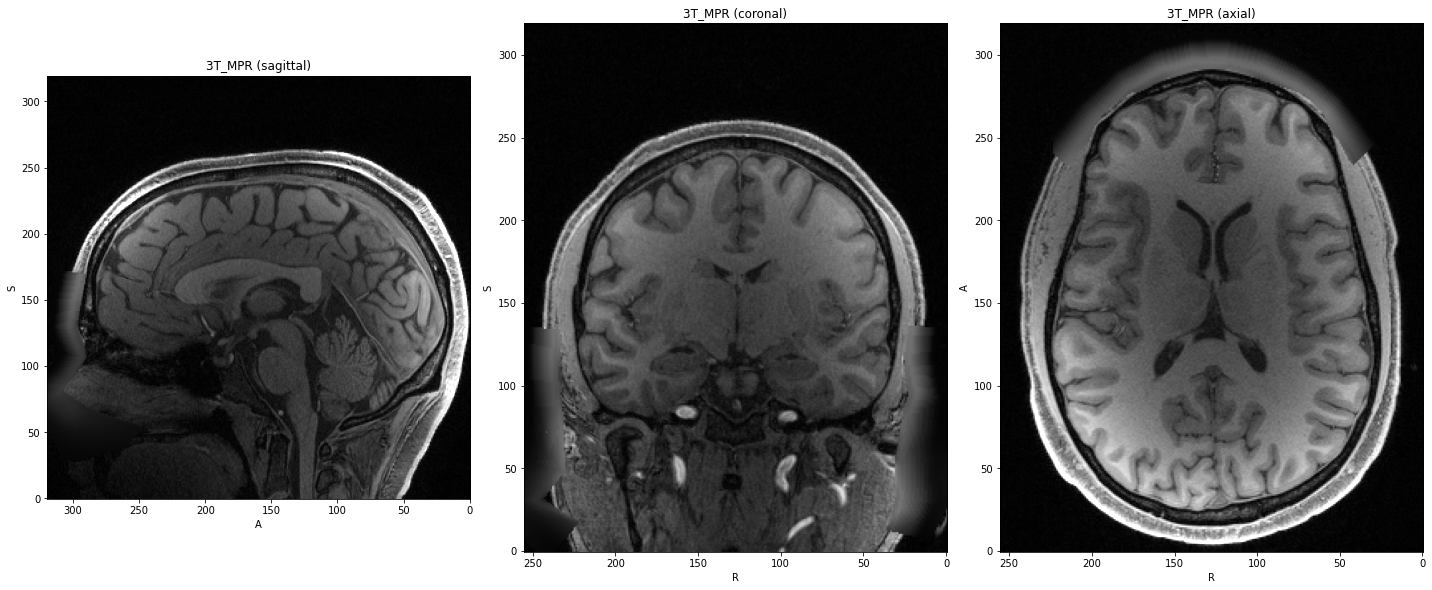



Subject: 2


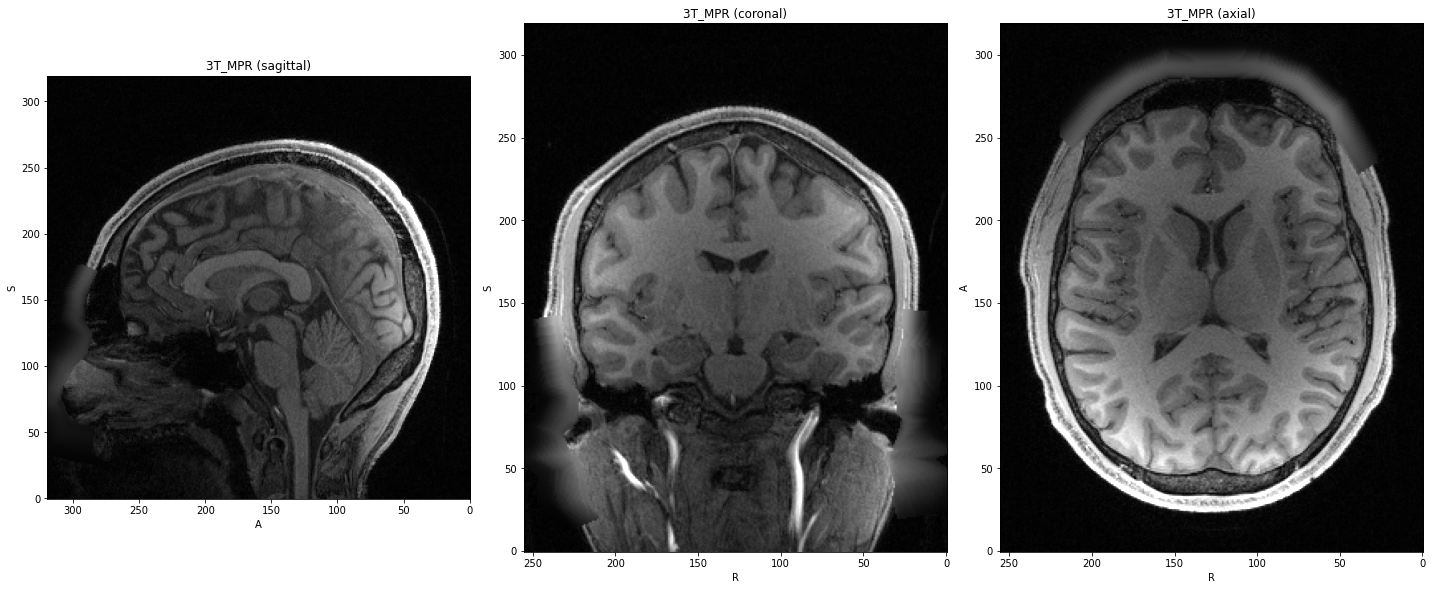



Subject: 3


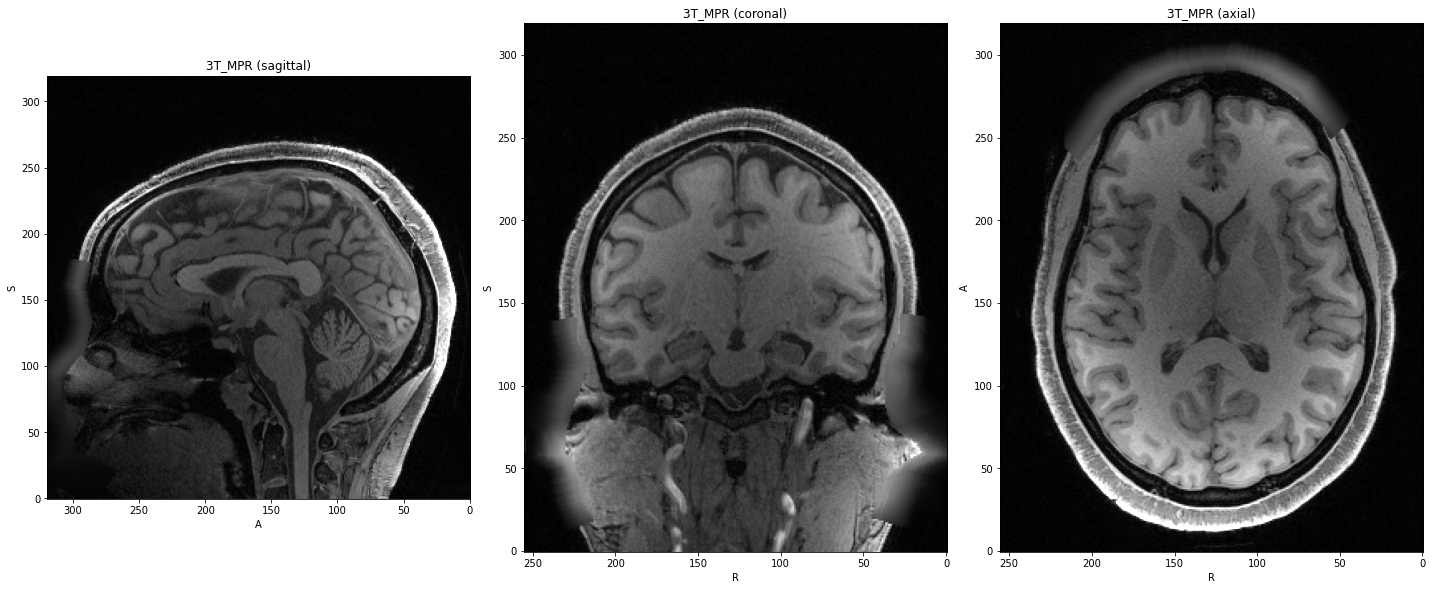

In [11]:
plot_batch(train_batch)

Subject: 1


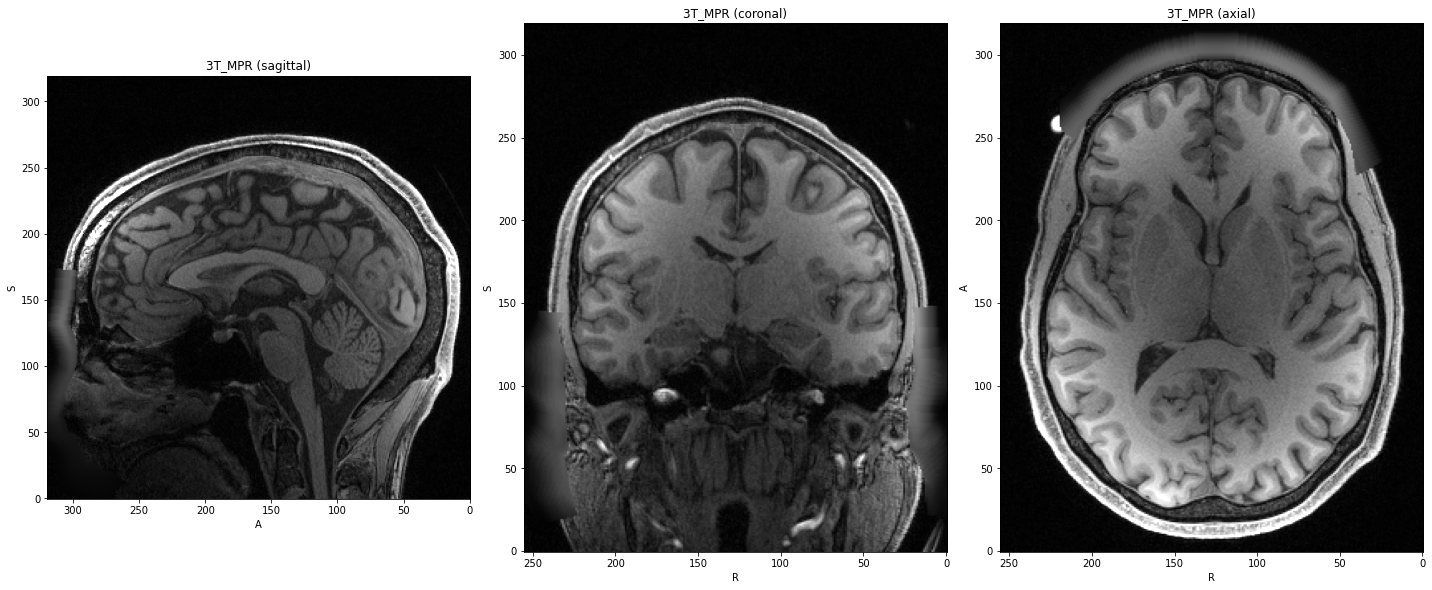



Subject: 2


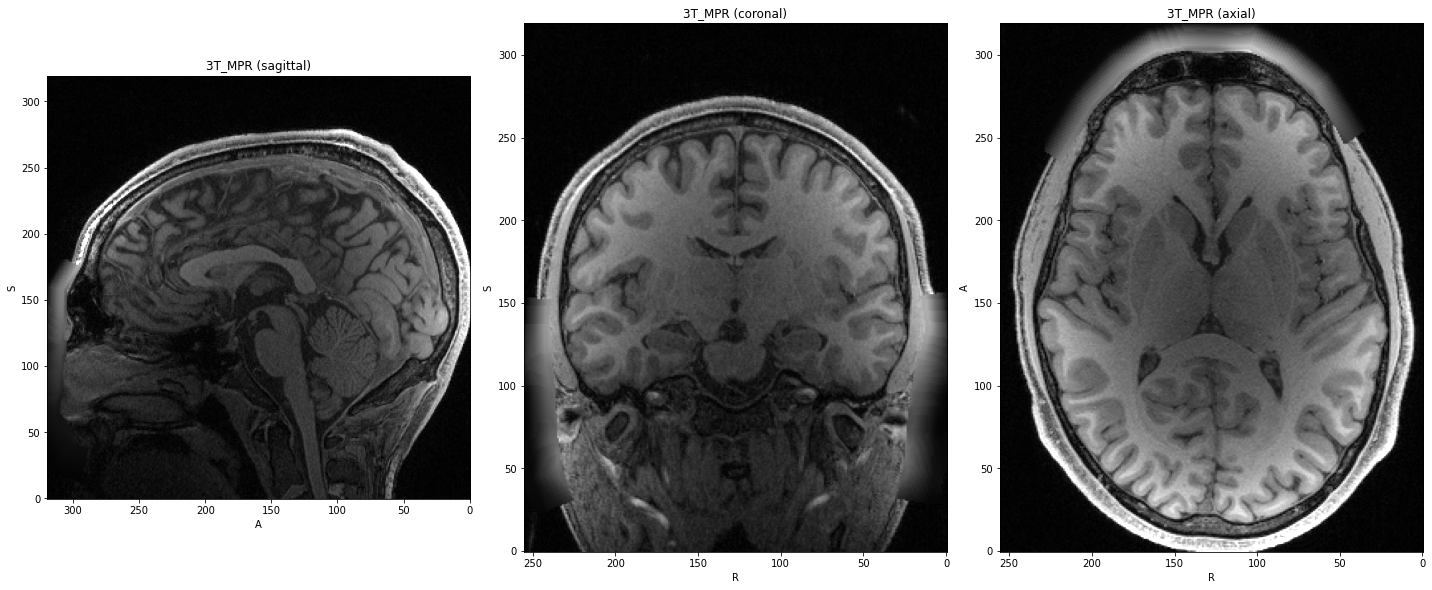

In [12]:
plot_batch(test_batch)

#### Save Preprocessed Images

In [22]:
data.save(train_dataloader, subj_dir='radio_3T_MPR/unprocessed', fold='train')
data.save(test_dataloader, subj_dir='radio_3T_MPR/unprocessed', fold='test')
data.save(val_dataloader, subj_dir='radio_3T_MPR/unprocessed', fold='val')